In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import plotnine as p9

In [2]:
ames = pd.read_csv("AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()


In [3]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

In [4]:
print(X.head())
print(y[:5])

   MS SubClass MS Zoning  Lot Area Street Lot Shape Land Contour Utilities  \
0           20        RL     31770   Pave       IR1          Lvl    AllPub   
1           20        RH     11622   Pave       Reg          Lvl    AllPub   
2           20        RL     14267   Pave       IR1          Lvl    AllPub   
3           20        RL     11160   Pave       Reg          Lvl    AllPub   
4           60        RL     13830   Pave       IR1          Lvl    AllPub   

  Lot Config Land Slope Neighborhood  ... Open Porch SF Enclosed Porch  \
0     Corner        Gtl        NAmes  ...            62              0   
1     Inside        Gtl        NAmes  ...             0              0   
2     Corner        Gtl        NAmes  ...            36              0   
3     Corner        Gtl        NAmes  ...             0              0   
4     Inside        Gtl      Gilbert  ...            34              0   

  3Ssn Porch Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0       

In [5]:
print(X.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
 

In [6]:
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_exclude=np.number)

numeric_features = num_sel(X)
categorical_features = cat_sel(X)

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        # Use sparse_output=False if your sklearn >= 1.2; sparse=False is broadly compatible
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

In [8]:
ols_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [9]:
ols_cv = cross_val_score(ols_pipe, X, y, cv=5, scoring='r2')
ols_pipe.fit(X, y)
ols_feat_names = ols_pipe.named_steps['preprocessor'].get_feature_names_out().tolist()
ols_coefs = pd.Series(ols_pipe.named_steps['regressor'].coef_, index=ols_feat_names, name='OLS')


C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [17, 28] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4, 14, 15] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 9, 13, 14, 15, 19, 24] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [7, 9, 13, 15, 27, 29, 31] during transform. These unknown categories will be encoded as

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with $\lambda = 1$.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [10]:
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])




In [11]:
ridge_cv = cross_val_score(ridge_pipe, X, y, cv=5, scoring='r2')
ridge_pipe.fit(X, y)
ridge_feat_names = ridge_pipe.named_steps['preprocessor'].get_feature_names_out().tolist()
ridge_coefs = pd.Series(ridge_pipe.named_steps['regressor'].coef_, index=ridge_feat_names, name='Ridge')

print("Cross-validated R^2 (mean ± sd)")
print(f"OLS   : {ols_cv.mean()} ± {ols_cv.std()}")
print(f"Ridge : {ridge_cv.mean()} ± {ridge_cv.std()}")

C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [17, 28] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4, 14, 15] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 9, 13, 14, 15, 19, 24] during transform. These unknown categories will be encoded as all zeros
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [7, 9, 13, 15, 27, 29, 31] during transform. These unknown categories will be encoded as

Cross-validated R^2 (mean ± sd)
OLS   : 0.8006454789211854 ± 0.09689149409406662
Ridge : 0.8617026958343003 ± 0.05502096819990848


In [12]:
coef_cmp_ols_ridge = (
    pd.concat([ols_coefs, ridge_coefs], axis=1)
      .reset_index()
      .melt(id_vars='index', var_name='Model', value_name='Coefficient')
      .rename(columns={'index': 'Feature'})
)
top_k = 40
top_feats = (coef_cmp_ols_ridge.groupby('Feature')['Coefficient']
             .apply(lambda s: s.abs().max()).sort_values(ascending=False).head(top_k).index)
p1 = (p9.ggplot(coef_cmp_ols_ridge[coef_cmp_ols_ridge['Feature'].isin(top_feats)],
                p9.aes(x='Feature', y='Coefficient', fill='Model'))
      + p9.geom_col(position='dodge')
      + p9.coord_flip()
      + p9.labs(title='Coefficients: OLS vs Ridge (alpha=1)', x='', y='Coefficient')
      + p9.theme(
        axis_text_y=p9.element_text(size=6)  # smaller feature names
        ))

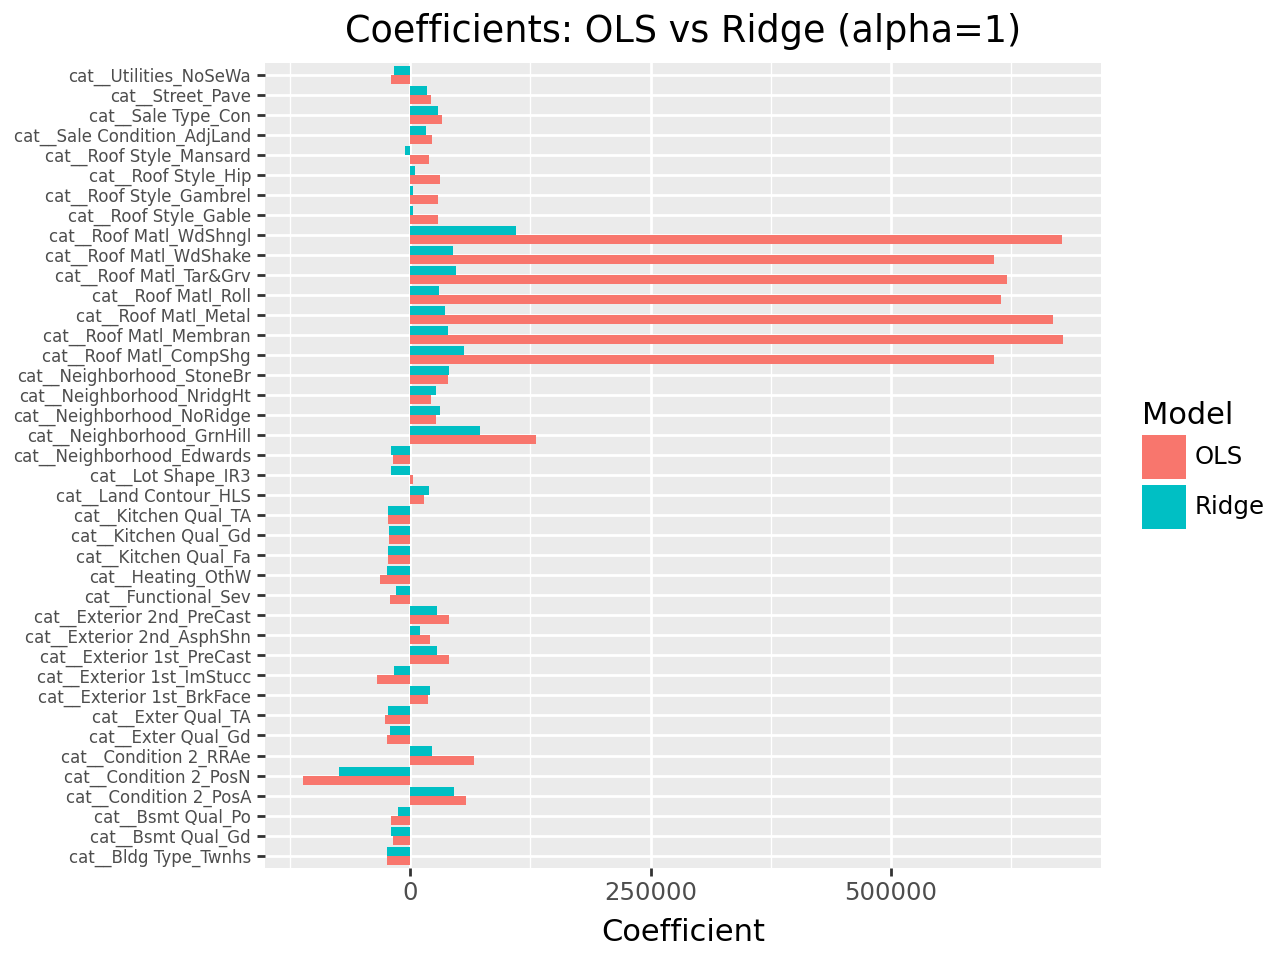

In [13]:
p1.show()

Create a LASSO pipeline, and tune $\lambda$.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [14]:
lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=5000, random_state=42))
])

In [15]:
lasso_grid = {'regressor__alpha': np.logspace(-3, 2, 30)}
lasso_gs = GridSearchCV(lasso_pipe, lasso_grid, scoring='r2', cv=5, n_jobs=-1)
lasso_gs.fit(X, y)
print(f"Best LASSO alpha: {lasso_gs.best_params_['regressor__alpha']}")
print(f"Best LASSO CV R^2: {lasso_gs.best_score_}")

Best LASSO alpha: 67.23357536499334
Best LASSO CV R^2: 0.8652080100285335


In [16]:
lasso_best = lasso_gs.best_estimator_
lasso_feat_names = lasso_best.named_steps['preprocessor'].get_feature_names_out().tolist()
lasso_coefs = pd.Series(lasso_best.named_steps['regressor'].coef_, index=lasso_feat_names, name='LASSO')


In [17]:
coef_cmp3 = (
    pd.concat([ols_coefs, ridge_coefs, lasso_coefs], axis=1)
      .reset_index()
      .melt(id_vars='index', var_name='Model', value_name='Coefficient')
      .rename(columns={'index': 'Feature'})
)
top_feats3 = (coef_cmp3.groupby('Feature')['Coefficient']
              .apply(lambda s: s.abs().max()).sort_values(ascending=False).head(top_k).index)
p2 = (p9.ggplot(coef_cmp3[coef_cmp3['Feature'].isin(top_feats3)],
                p9.aes(x='Feature', y='Coefficient', fill='Model'))
      + p9.geom_col(position='dodge')
      + p9.coord_flip()
      + p9.labs(title='Coefficients: OLS vs Ridge vs LASSO', x='', y='Coefficient')
      + p9.theme(
        axis_text_y=p9.element_text(size=6)  # smaller feature names
        ))

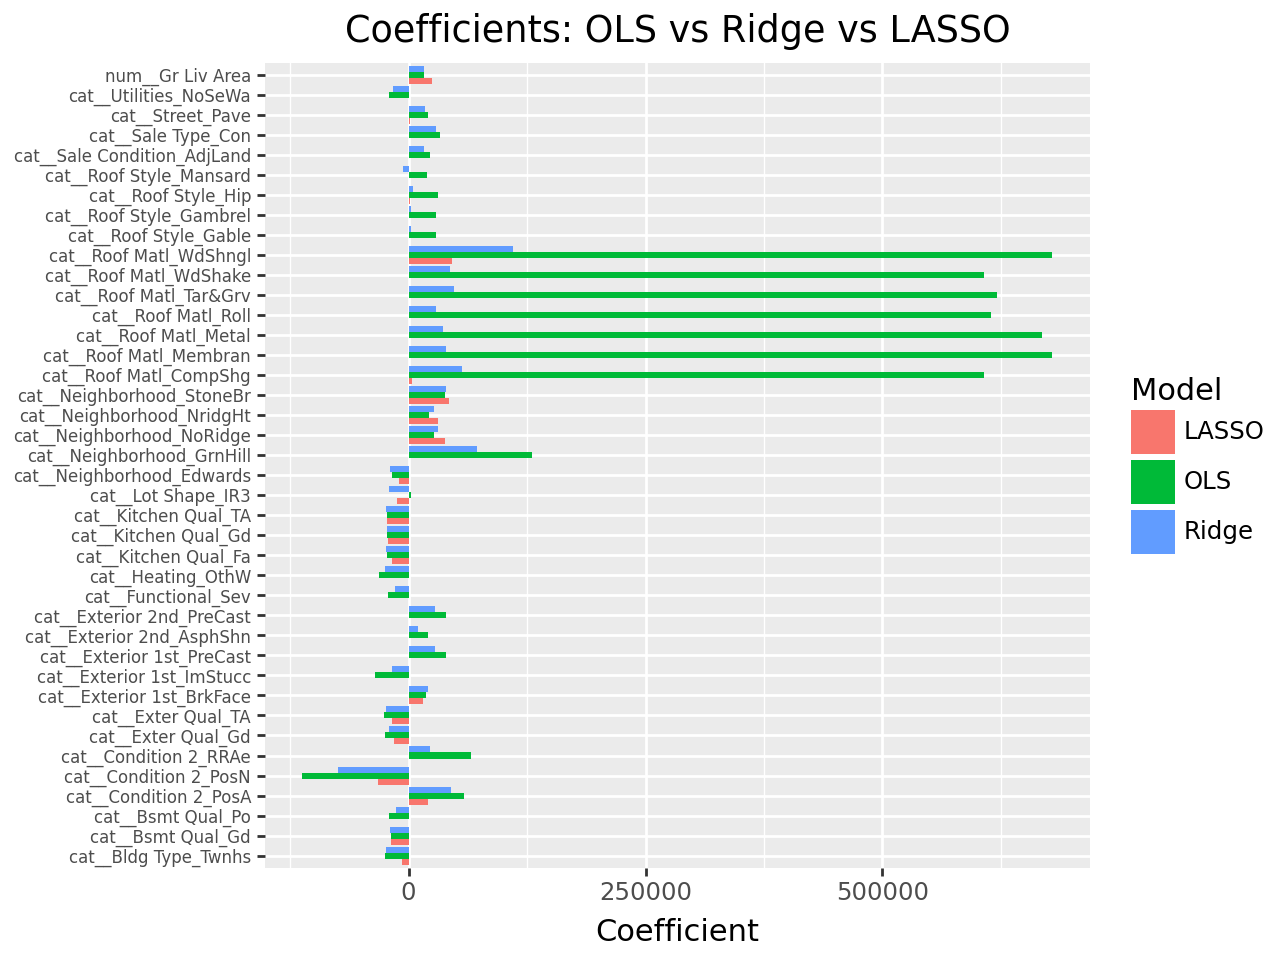

In [18]:
p2.show()

Create an Elastic Net pipeline, and tune $\lambda$ and $\alpha$.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [19]:
enet_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=5000, random_state=42))
])

enet_grid = {
    'regressor__alpha': np.logspace(-3, 2, 15),
    'regressor__l1_ratio': np.linspace(0.05, 0.95, 10)
}

In [20]:
enet_gs = GridSearchCV(enet_pipe, enet_grid, scoring='r2', cv=5, n_jobs=-1)
enet_gs.fit(X, y)
print("Best Elastic Net params:", enet_gs.best_params_)
print(f"Best Elastic Net CV R^2: {enet_gs.best_score_}")


Best Elastic Net params: {'regressor__alpha': np.float64(0.011787686347935873), 'regressor__l1_ratio': np.float64(0.75)}
Best Elastic Net CV R^2: 0.864525443742427


In [21]:
enet_best = enet_gs.best_estimator_
enet_feat_names = enet_best.named_steps['preprocessor'].get_feature_names_out().tolist()
enet_coefs = pd.Series(enet_best.named_steps['regressor'].coef_, index=enet_feat_names, name='ElasticNet')


In [22]:
coef_cmp4 = (
    pd.concat([ols_coefs, ridge_coefs, lasso_coefs, enet_coefs], axis=1)
      .reset_index()
      .melt(id_vars='index', var_name='Model', value_name='Coefficient')
      .rename(columns={'index': 'Feature'})
)
top_feats4 = (coef_cmp4.groupby('Feature')['Coefficient']
              .apply(lambda s: s.abs().max()).sort_values(ascending=False).head(top_k).index)
p3 = (p9.ggplot(coef_cmp4[coef_cmp4['Feature'].isin(top_feats4)],
                p9.aes(x='Feature', y='Coefficient', fill='Model'))
      + p9.geom_col(position='dodge')
      + p9.coord_flip()
      + p9.labs(title='Coefficients: OLS vs Ridge vs LASSO vs Elastic Net', x='', y='Coefficient')
      + p9.theme(
        axis_text_y=p9.element_text(size=6)  # smaller feature names
        ))

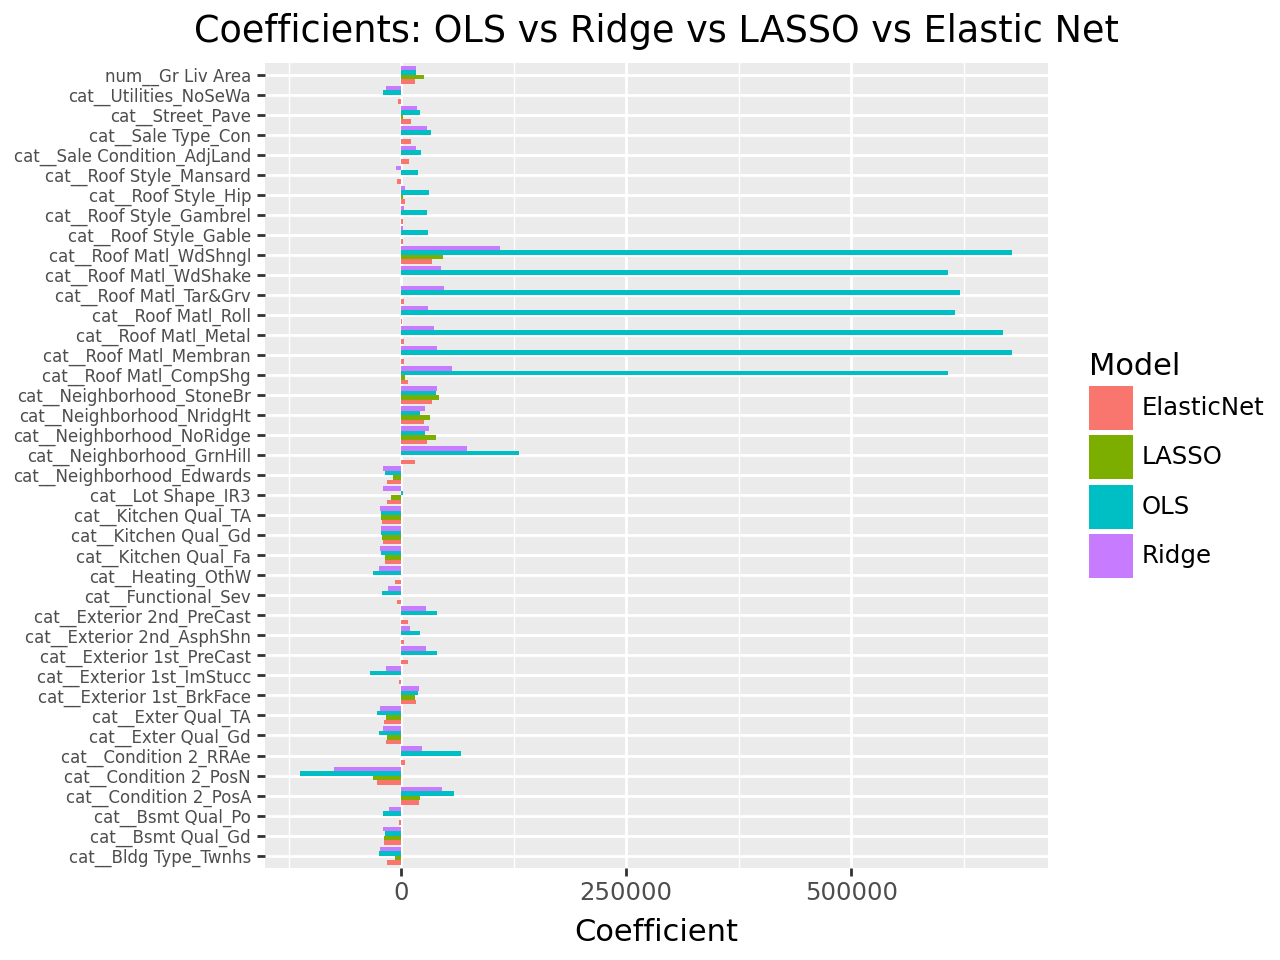

In [23]:
p3.show()